#### 低通滤波器demo

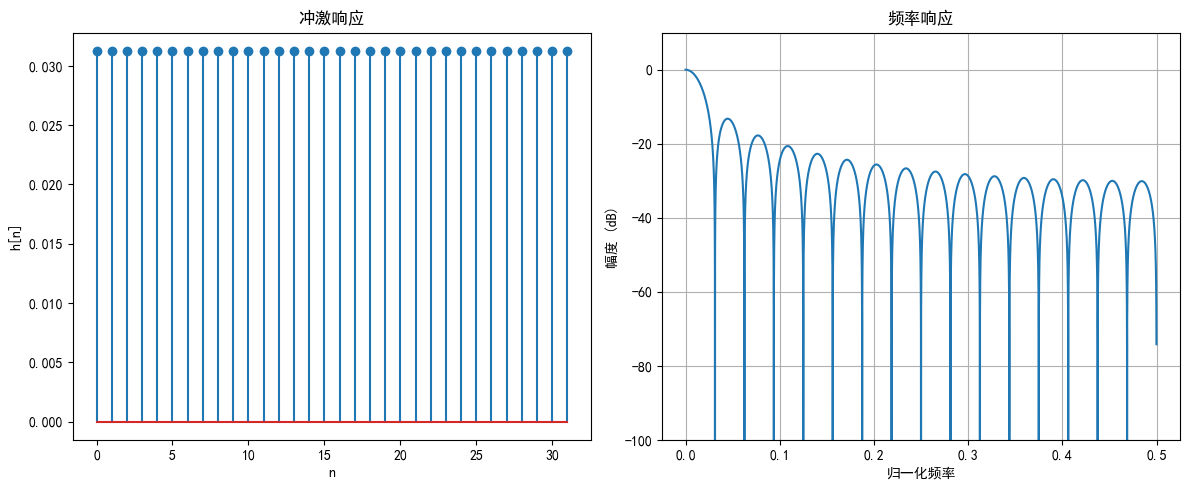

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from matplotlib import rcParams

# 设置中文字体支持
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

def design_fir_fsam(N, Hk):
    """
    使用频率采样法设计FIR滤波器。

    参数：
    - N: 滤波器长度（滤波器阶数为 N-1）
    - Hk: 理想频率响应在频率采样点的值（长度为 N）

    返回值：
    - h: 设计的FIR滤波器的冲激响应系数
    """
    # 计算IDFT得到冲激响应
    h = np.real(np.fft.ifft(Hk))
    return h

def example_lowpass(N, cutoff_freq):
    """
    设计一个低通FIR滤波器的示例。

    参数：
    - N: 滤波器长度
    - cutoff_freq: 截止频率（归一化，范围0到0.5）

    返回值：
    - h: 设计的FIR滤波器的冲激响应系数
    """
    k = np.arange(N)
    Hk = np.zeros(N, dtype=complex)
    freq = k / N

    # 定义理想频率响应
    for i in range(N):
        if freq[i] <= cutoff_freq or freq[i] >= 1 - cutoff_freq:
            Hk[i] = 1
        else:
            Hk[i] = 0

    # 调整相位以获得实数冲激响应
    Hk = Hk * np.exp(-1j * np.pi * (N - 1) * k / N)

    # 计算冲激响应
    h = design_fir_fsam(N, Hk)
    return h

def plot_filter(h):
    """
    绘制滤波器的冲激响应和频率响应。

    参数：
    - h: 滤波器的冲激响应系数
    """
    N = len(h)
    n = np.arange(N)
    w, H = freqz(h, worN=8000)
    freq = w / (2 * np.pi)

    plt.figure(figsize=(12, 5))

    # 冲激响应
    plt.subplot(1, 2, 1)
    plt.stem(n, h)
    plt.title('冲激响应')
    plt.xlabel('n')
    plt.ylabel('h[n]')

    # 频率响应
    plt.subplot(1, 2, 2)
    plt.plot(freq, 20 * np.log10(np.abs(H)))
    plt.title('频率响应')
    plt.xlabel('归一化频率')
    plt.ylabel('幅度 (dB)')
    plt.ylim([-100, 10])
    plt.grid()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    N = 32        # 滤波器长度
    cutoff_freq = 0.25   # 截止频率（归一化，0到0.5）

    h = example_lowpass(N, cutoff_freq)
    plot_filter(h)


### 带通滤波器demo

/var/folders/f_/zgh1n7tj6wqcgk47sst4brvw0000gn/T/ipykernel_7640/1592902521.py:77: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freq, 20 * np.log10(np.abs(H)))


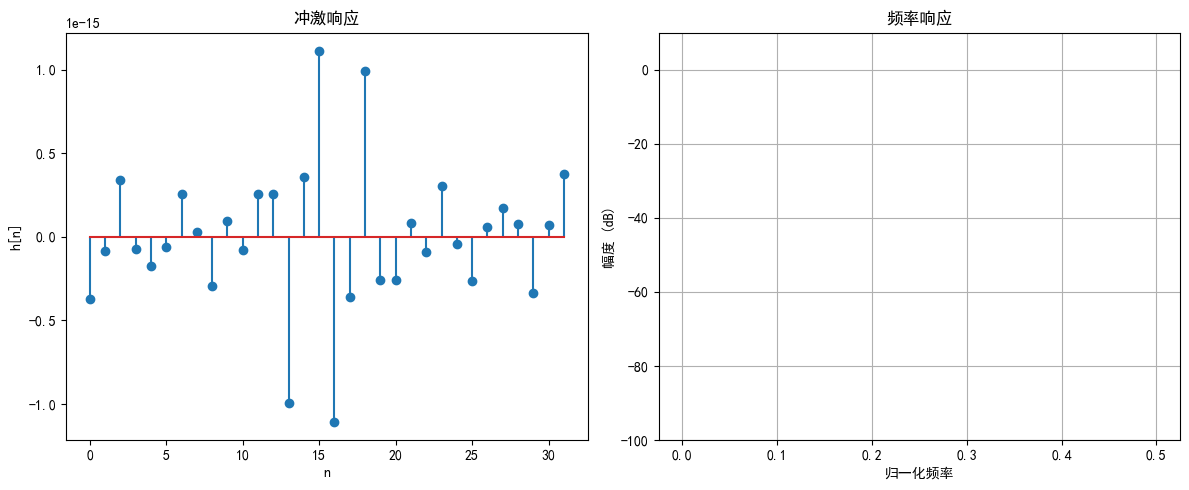

In [3]:
def example_bandpass(N, cutoff_freq1, cutoff_freq2):
    """
    设计一个带通FIR滤波器的示例。

    参数：
    - N: 滤波器长度
    - cutoff_freq1: 带通频率下限（归一化，范围0到0.5）
    - cutoff_freq2: 带通频率上限（归一化，范围0到0.5）

    返回值：
    - h: 设计的FIR滤波器的冲激响应系数
    """
    k = np.arange(N)
    Hk = np.zeros(N, dtype=complex)
    freq = k / N

    # 定义理想频率响应
    for i in range(N):
        if (freq[i] >= cutoff_freq1 and freq[i] <= cutoff_freq2) or \
           (freq[i] >= 1 - cutoff_freq2 and freq[i] <= 1 - cutoff_freq1):
            Hk[i] = 1
        else:
            Hk[i] = 0

    # 相位校正
    Hk = Hk * np.exp(-1j * np.pi * (N - 1) * k / N)

    # 计算冲激响应
    h = design_fir_fsam(N, Hk)
    return h

if __name__ == "__main__":
    N = 32        # 滤波器长度
    cutoff_freq1 = 0.2   # 带通频率下限
    cutoff_freq2 = 0.4   # 带通频率上限

    h = example_bandpass(N, cutoff_freq1, cutoff_freq2)
    plot_filter(h)
